In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from dataset import QuixoDataset
from training import run_train, calculate_accuracy, TransformerModel, QuixoDataset
from tokenization import vocab_size, PAD_ID
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

model_path = "model_1.pth"
batch_size = 32
learning_rate = 0.0001
num_epochs = 20

In [2]:
size = 640
path = "../data/v2"
train_data = pd.read_csv(f"{path}/3_train_30000.csv")[:size]
val_data = pd.read_csv(f"{path}/val_15000.csv")[:size]
test_data = pd.read_csv(f"{path}/test_15000.csv")[:size]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerModel(
    d_model = 512,
    nhead = 8,
    num_encoder_layers = 6,
    num_decoder_layers = 6,
    dim_feedforward = 2048,
    dropout = 0.1,
    vocab_size=vocab_size
)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion=nn.CrossEntropyLoss(ignore_index=PAD_ID)

In [3]:
metrics = {'train_loss': []}
def drawing(curr_loss=0):
    step = metrics['train_loss'][-1][0] + 1 if len(metrics['train_loss']) > 0 else 0
    metrics['train_loss'].append((step, curr_loss))
    clear_output(True)
    plt.figure(figsize=(12,4))
    for j, (name, history) in enumerate(sorted(metrics.items())):
        plt.subplot(1, len(metrics), j + 1)
        plt.title(name)
        plt.plot(*zip(*history))
        plt.ylabel("Loss")
        plt.xlabel("Step")
        plt.grid()
    plt.show()
    
    print("Mean loss=%.3f" % np.mean(metrics['train_loss'][-10:], axis=0)[1], flush=True)

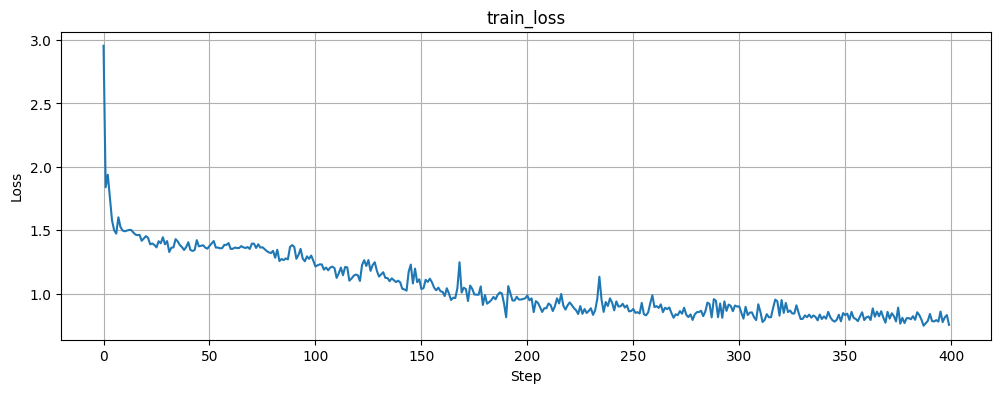

Mean loss=0.800


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]

Epoch: 20, Train loss: 0.800, Epoch time = 21.196s


In [4]:
train_dataset = QuixoDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


model = run_train(model=model, 
                  device=device,  
                  optimizer=optimizer,
                  criterion=criterion,
                  train_loader=train_loader,
                  num_epochs=num_epochs,
                  drawing=drawing)

In [5]:
torch.save(model.state_dict(), model_path)

In [6]:
test_dataset = QuixoDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
accuracy = calculate_accuracy(model, test_loader, device)
print(f"Test Accuracy: {accuracy}")

  5%|█████▍                                                                                                      | 1/20 [00:02<00:44,  2.32s/it]

------------Batch 0 on inference------------

Input :
O#O#O
##O#X
###XX
XX#XX
O##O#
<SEP>41leftX<EOS>

Generated :
<BOS>XX##X
O####
X####
X####
XOXOXO
<EOS>OXO

Target :
<BOS>O#O#O
##O#X
###XX
XX#XX
O#O#X
<EOS>


 30%|████████████████████████████████▍                                                                           | 6/20 [00:13<00:31,  2.27s/it]

------------Batch 5 on inference------------

Input :
XXOOX
#####
####X
####O
####X
<SEP>41leftO<EOS>

Generated :
<BOS>X####
#####
#####
#####X
X##XOX
<EOS>OX

Target :
<BOS>XXOOX
#####
####X
####O
###XO
<EOS>


 55%|██████████████████████████████████████████████████████████▊                                                | 11/20 [00:25<00:20,  2.28s/it]

------------Batch 10 on inference------------

Input :
OOXXO
XXX##
OX###
XX###
O#X#O
<SEP>14upO<EOS>

Generated :
<BOS>XXOXO
O###X
X####
X####
XXOXOX
<EOS>OXO

Target :
<BOS>OOXXO
XXX##
OX###
XX##O
O#X#O
<EOS>


 80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 16/20 [00:36<00:09,  2.28s/it]

------------Batch 15 on inference------------

Input :
XOXOO
OXX##
XOX##
XO##X
#XOOX
<SEP>42leftO<EOS>

Generated :
<BOS>XOXOX
O###X
X###O
X###X
XOXOXO
<EOS>XOX

Target :
<BOS>XOXOO
OXX##
XOX##
XO##X
#XOXO
<EOS>


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.28s/it]

Test Accuracy: 0.0
